# Multiple dispatch

**Multiple dispatch** is a key feature of Julia, that we will explore in this notebook.

It helps make software fast. It also makes software extensible, programmable, and downright fun to play with. 

It may just herald a breakthrough for parallel computation.

1. Roman numerals
2. Functions
3. Parallel computing

## 1. Roman numerals (for fun)

Let's define a **new struct** that represents a Roman numeral. For coding simplicity, we'll just deal with numbers between 0 and 9. 

Create a struct `Roman` that takes an attriubute `n`.
And add a new method to `Base.show` that 

**Exercise**: Extend this to larger numbers. (Recall that Roman numbers are a base-10 system!)

In [1]:
struct Roman
    n::Int
end

Base.show(io::IO, r::Roman) = print(io, 'ⅰ' + (r.n - 1) % 10 )  # nice display; 'ⅰ' is a Unicode Roman numeral

In [2]:
'ⅰ'

'ⅰ': Unicode U+2170 (category Nl: Number, letter)

We can create an object of this type as follows:

In [2]:
Roman(4)

ⅳ

In [3]:
typeof.([5 5.0 Roman(5) "Five" '5'  5//1])

1×6 Array{DataType,2}:
 Int64  Float64  Roman  String  Char  Rational{Int64}

We would like to display it nicely, in Roman numerals:

In [4]:
x = [7 1 2 5 8 9]
Roman.(x)   # equivalent to map(Roman, x)  or  [Roman(w) for w in x]

1×6 Array{Roman,2}:
 ⅶ  ⅰ  ⅱ  ⅴ  ⅷ  ⅸ

It'd be nice to be able to add Roman numerals together like normal numbers:

In [5]:
Roman(4) + Roman(5)

MethodError: MethodError: no method matching +(::Roman, ::Roman)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502

But Julia doesn't know how to do that. Let's teach it by `import`ing the `+` function, which then allows us to _extend_ its definition:

In [6]:
import Base: +, *

+(a::Roman, b::Roman) = Roman(a.n + b.n)

+ (generic function with 164 methods)

In [9]:
Roman(4) + Roman(5)

ⅸ

This **adds a new method** to the function `+`:

In [10]:
methods(+)

# 164 methods for generic function "+":
[1] +(x::Bool, z::Complex{Bool}) in Base at complex.jl:277
[2] +(x::Bool, y::Bool) in Base at bool.jl:104
[3] +(x::Bool) in Base at bool.jl:101
[4] +(x::Bool, y::T) where T<:AbstractFloat in Base at bool.jl:112
[5] +(x::Bool, z::Complex) in Base at complex.jl:284
[6] +(a::Float16, b::Float16) in Base at float.jl:392
[7] +(x::Float32, y::Float32) in Base at float.jl:394
[8] +(x::Float64, y::Float64) in Base at float.jl:395
[9] +(z::Complex{Bool}, x::Bool) in Base at complex.jl:278
[10] +(z::Complex{Bool}, x::Real) in Base at complex.jl:292
[11] +(::Missing, ::Missing) in Base at missing.jl:92
[12] +(::Missing) in Base at missing.jl:79
[13] +(::Missing, ::Number) in Base at missing.jl:93
[14] +(level::Base.CoreLogging.LogLevel, inc::Integer) in Base.CoreLogging at logging.jl:106
[15] +(c::BigInt, x::BigFloat) in Base.MPFR at mpfr.jl:353
[16] +(a::BigInt, b::BigInt, c::BigInt, d::BigInt, e::BigInt) in Base.GMP at gmp.jl:443
[17] +(a::BigInt, b::BigInt, c::BigInt, d::BigInt) in Base.GMP at gmp.jl:442
[18] +(a::BigInt, b::BigInt, c::BigInt) in Base.GMP at gmp.jl:441
[19] +(x::BigInt, y::BigInt) in Base.GMP at gmp.jl:412
[20] +(x::BigInt, c::Union{UInt16, UInt32, UInt64, UInt8}) in Base.GMP at gmp.jl:449
[21] +(x::BigInt, c::Union{Int16, Int32, Int64, Int8}) in Base.GMP at gmp.jl:455
[22] +(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat, e::BigFloat) in Base.MPFR at mpfr.jl:503
[23] +(a::BigFloat, b::BigFloat, c::BigFloat, d::BigFloat) in Base.MPFR at mpfr.jl:496
[24] +(a::BigFloat, b::BigFloat, c::BigFloat) in Base.MPFR at mpfr.jl:490
[25] +(x::BigFloat, c::BigInt) in Base.MPFR at mpfr.jl:349
[26] +(x::BigFloat, y::BigFloat) in Base.MPFR at mpfr.jl:318
[27] +(x::BigFloat, c::Union{UInt16, UInt32, UInt64, UInt8}) in Base.MPFR at mpfr.jl:325
[28] +(x::BigFloat, c::Union{Int16, Int32, Int64, Int8}) in Base.MPFR at mpfr.jl:333
[29] +(x::BigFloat, c::Union{Float16, Float32, Float64}) in Base.MPFR at mpfr.jl:341
[30] +(x::Dates.CompoundPeriod, y::Dates.CompoundPeriod) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/periods.jl:349
[31] +(x::Dates.CompoundPeriod, y::Dates.Period) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/periods.jl:347
[32] +(x::Dates.CompoundPeriod, y::Dates.TimeType) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/periods.jl:385
[33] +(x::Dates.Date, y::Dates.Day) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:78
[34] +(x::Dates.Date, y::Dates.Week) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:76
[35] +(dt::Dates.Date, z::Dates.Month) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:59
[36] +(dt::Dates.Date, y::Dates.Year) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:32
[37] +(dt::Dates.Date, t::Dates.Time) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:20
[38] +(t::Dates.Time, dt::Dates.Date) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:24
[39] +(x::Dates.Time, y::Dates.TimePeriod) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:82
[40] +(dt::Dates.DateTime, z::Dates.Month) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:52
[41] +(dt::Dates.DateTime, y::Dates.Year) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:28
[42] +(x::Dates.DateTime, y::Dates.Period) in Dates at /buildworker/worker/package_linux64/build/usr/share/julia/stdlib/v1.0/Dates/src/arithmetic.jl:80
[43] +(B::BitArray{2}, J::LinearAlgebra.UniformScaling) 

In [11]:
import Base.*
*(i::Roman, j::Roman) = Roman(i.n * j.n)                     # Multiply like a Roman

* (generic function with 344 methods)

In [12]:
Roman(3) * Roman(2)

ⅵ

In [13]:
Roman.(1:3) .* [Roman(1) Roman(2) Roman(3)]

3×3 Array{Roman,2}:
 ⅰ  ⅱ  ⅲ
 ⅱ  ⅳ  ⅵ
 ⅲ  ⅵ  ⅸ

But 

In [14]:
Roman(3) * 2

MethodError: MethodError: no method matching *(::Roman, ::Int64)
Closest candidates are:
  *(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:502
  *(!Matched::Complex{Bool}, ::Real) at complex.jl:300
  *(!Matched::Missing, ::Number) at missing.jl:93
  ...

In [15]:
# Complicated mytimes to decide what to do based on type
# not suggested, better way coming soon
function mytimes(i,j)
  if isa(i,Roman) & isa(j,Number)
        return  fill(1, i.n, j)   # i by j matrix with ones
    elseif    isa(i,Number) & isa(j,Roman) 
        return "😄"^ (i*j.n)   #  i * j happy faces
    else
        return("I Don't know")
    end
end

mytimes (generic function with 1 method)

In [16]:
mytimes(4,Roman(3)) # Twelve happys

"😄😄😄😄😄😄😄😄😄😄😄😄"

In [17]:
mytimes(Roman(4),3) # 4x3 matrix with ones

4×3 Array{Int64,2}:
 1  1  1
 1  1  1
 1  1  1
 1  1  1

The simplest thing to do is to explicitly define multiplication of a `Roman` by a number. We can do it as we see fit:

In [18]:
*(i::Number, j::Roman) = "😄"^ (i*j.n)        #  i * j happy faces

*(i::Roman, j::Number) =   fill(1, i.n, j)       # i by j matrix

* (generic function with 346 methods)

In [19]:
3 * Roman(3) # Nine happys

"😄😄😄😄😄😄😄😄😄"

In [20]:
Roman(3) * 5  # Three by Five matrix of ones

3×5 Array{Int64,2}:
 1  1  1  1  1
 1  1  1  1  1
 1  1  1  1  1

In [21]:
t(x::Roman,y::Roman) = x.n * y.n

t (generic function with 1 method)

In [22]:
t(Roman(5),Roman(4))

20

In [23]:
#  Notice how tight the assembler is!
@code_native t(Roman(2),Roman(4))

	.text
; Function t {
; Location: In[21]:1
; Function *; {
; Location: In[21]:1
	movq	(%rsi), %rax
	imulq	(%rdi), %rax
;}
	retq
	nopl	(%rax,%rax)
;}


## Functions

In [24]:
import Base: *, +, ^

In [25]:
*(α::Number,   g::Function) = x -> α * g(x)   # Scalar times function

*(f::Function, λ::Number)   = x -> f(λ * x)   # Scale the argument

*(f::Function, g::Function) = x -> f(g(x))    # Function composition  -- abuse of notation!  use \circ in Julia 0.6

^(f::Function, n::Integer) = n == 1 ? f : f*f^(n-1) # A naive exponentiation algorithm by recursive multiplication

^ (generic function with 63 methods)

In [26]:
+(f::Function, g::Function) = x -> f(x) + g(x)

+ (generic function with 165 methods)

For example, the exponential function is defined as

$$\exp(x) = \sum_{n=0}^\infty \frac{1}{n!} x^n.$$

We can think of this just in terms of functions:

$$\exp = \sum_{n=0}^\infty \frac{1}{n!} \mathrm{pow}_n,$$

where $\mathrm{pow}_n(x) = x^n$.

(starts to blur the symbolic with the numerical!)

In [27]:
pow(n) = x -> x^n

myexp = sum(1/factorial(big(n)) * pow(n) for n in 0:100)   # taylor series not efficient!

#9 (generic function with 1 method)

In [29]:
[myexp(1); exp(1); exp(big(1))]

3-element Array{BigFloat,1}:
 2.718281828459045235360287471352662497757247093699959574966967627724076630353416
 2.718281828459045090795598298427648842334747314453125                           
 2.718281828459045235360287471352662497757247093699959574966967627724076630353555

In [30]:
f = x -> x^2
f(10)

100

In [31]:
g = 3f
g(10)

300

In [32]:
(f^2)(10)  # since we defined multiplication of functions as composition

10000

In [33]:
using Plots;
gr()

Plots.GRBackend()

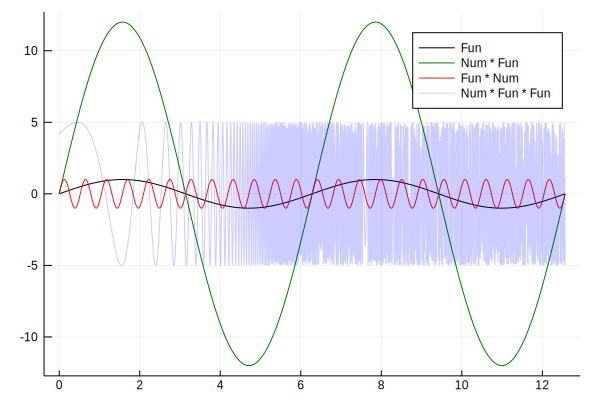

In [34]:
x = pi*(0:0.001:4)

plot(x, sin.(x),    c="black", label="Fun")
plot!(x, (12*sin).(x),    c="green", label="Num * Fun")
plot!(x, (sin*12).(x),    c="red", alpha=0.9, label="Fun * Num")
plot!(x, (5*sin*exp).(x), c="blue", alpha=0.2, label="Num * Fun * Fun")

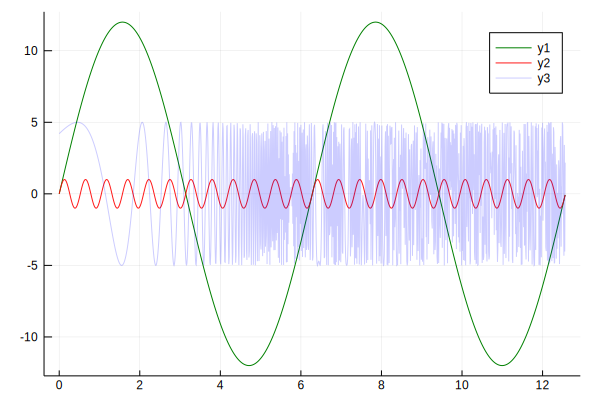

In [35]:
plot([12*sin, sin*12, 5*sin*exp], 0:.01:4π, α=[1 .9 .2], c=[:green :red :blue])

<img src="https://lh4.googleusercontent.com/--z5eKJbB7sg/UffjL1iAd4I/AAAAAAAABOc/S_wDVyDOBfQ/gauss.jpg">

###  "Sin^2 phi is odious to me, even though Laplace made use of it; should  it be feared that sin^2 phi might become ambiguous, which would perhaps  never occur, or at most very rarely when speaking of sin(phi^2), well  then, let us write (sin phi)^2, but not sin^2 phi, which by analogy  should signify sin(sin phi)." -- Gauss

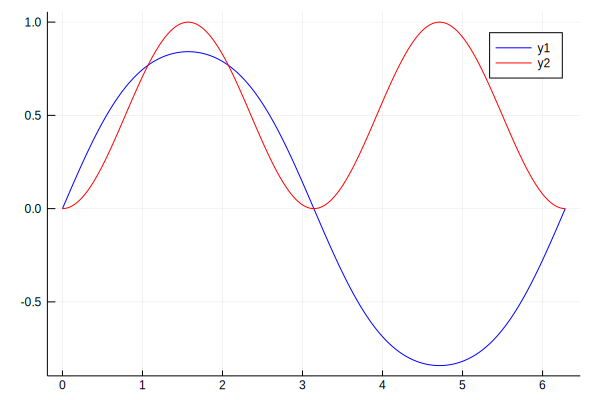

In [36]:
x=(0:.01:2) * pi;

plot(x, (sin^2).(x), c="blue")     # Squaring just works, y=sin(sin(x)), Gauss would be pleased!
plot!(x, sin.(x).^2,  c="red")         

# Exercise

In [37]:
h(a, b::Any) = "fallback"
h(a::Number, b::Number) = "a and b are both numbers"
h(a::Number, b) = "a is a number"
h(a, b::Number) = "b is a number"
h(a::Integer, b::Integer) = "a and b are both integers"

h (generic function with 5 methods)

In [41]:
a=4.0
b=4.0
h(a,b)

"a and b are both numbers"